<a href="https://colab.research.google.com/github/AdnanAli-10/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation.</u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

## <b>Business Context</b>

### <b>Customer segmentation:</b>
Customer segmentation is the process by which you divide your customers up based on common characteristics so you can market to those customers more effectively.

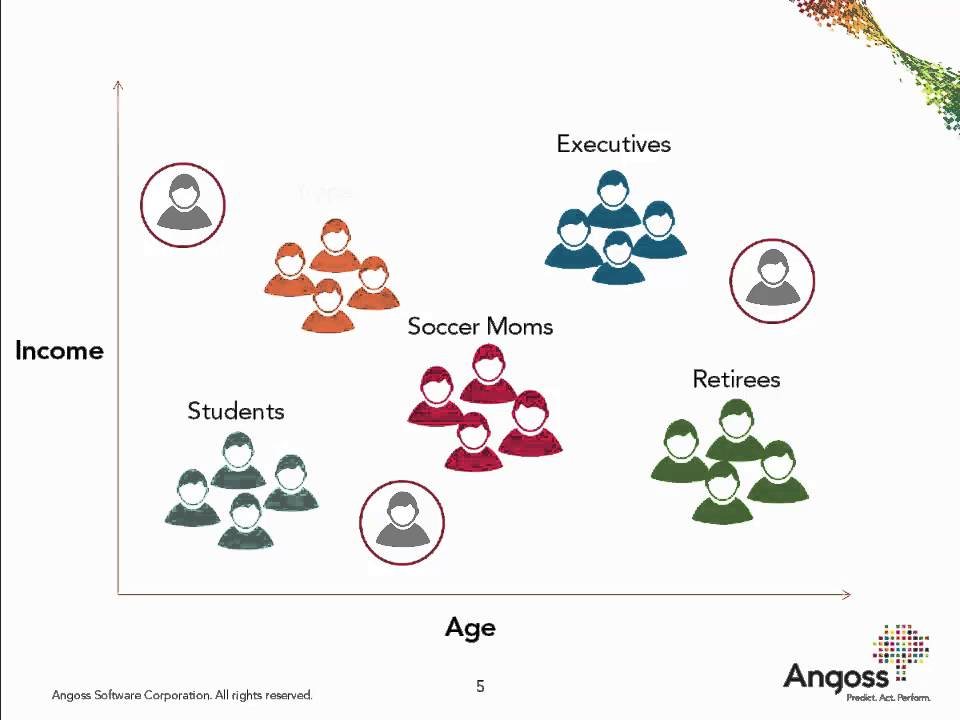

### <b>Different ways of segmentation:</b>

1. Demographic segmentation
2. Behavioral segmentation
3. Geographic segmentaion
4. Needs based segmentation
  
  and many more... 

### <b>Benefits of customer segmentation:</b>
1. Organised customer bases.
2. Targeted communication becomes easy.
3. Choosing top sales prospects becomes easy.
  
  and many more...

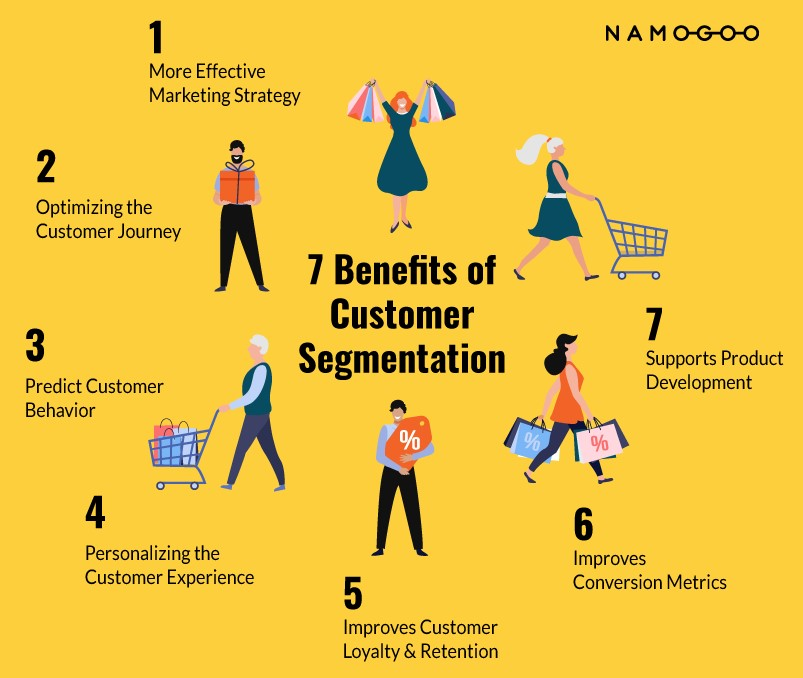

### <b>I'll be performing behavioral segmentation on our data in this project.</b> 

## <b>Project Flowchart:</b>
1. Initial preparations.
2. Data Cleaning.
3. EDA.
4. Feature Engineering.
5. Pre processing the data.
6. Clustering.
7. Cluster profiling.

## <b>Initial preparations:</b>

In [264]:
#Loading in the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the data
cs_df = pd.read_excel('/content/drive/MyDrive/Customer segmentation - Syed Adnan S/Online Retail.xlsx')

## <b>Data Cleaning:</b>

### <b>Data Exploration</b>

In [4]:
#First 5 observations of the dataframe
cs_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#Last 5 observations of the dataframe
cs_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
#shape of the dataset
cs_df.shape

(541909, 8)

In [7]:
#A concise summary of the dataset
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
#A statistical description of the dataset
cs_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### <b>Handling null values:</b>

In [9]:
#Checking if the dataset has null values
cs_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There isn't any meaningfull way to impute values in the Description and CustomerID column, therefore I will just delete them.

In [10]:
#Dropping the null values in the dataset
cs_df.dropna(inplace=True)

In [11]:
#Checking if the deletion has worked
cs_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<b>As we can see, all the null values have been deleted.</b>

### <b>Handling duplicate values:</b>

In [12]:
#Checking if the data has duplicate values
cs_df.duplicated().sum()

5225

In [13]:
#Deleting the duplicate values from the data
cs_df.drop_duplicates(inplace=True)

In [14]:
#Checking if the duplicate deletion has worked 
cs_df.duplicated().sum()

0

<b>As we can see, all the duplicates have been removed.</b>

### <b>Removing Outliers:</b>

In [15]:
cs_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [16]:
#Defining a list of columns that can contain outliers
out_pos_cols = ['Quantity','UnitPrice']

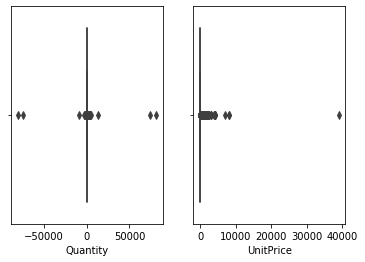

In [17]:
#Checking for outliers in the data
out_pos_cols = ['Quantity','UnitPrice']          #A list of columns that can possibly contain outliers.
for index, col in enumerate(out_pos_cols):
  plt.subplot(1,2,index+1)
  sns.boxplot(data = cs_df,x=col)

As we can see there are outliers in both the columns, Therefore we'll try to remove them. Here we can also see that, Quantity has negative values, which is practically impossible, these values represent cancelled orders and we'll deal with them later.

In [18]:
#Removing columns using the IQR method
def remove_outliers(data:pd.DataFrame,col:str):
  """A function that removes outliers using the IQR method"""
  
  #Calculating the upper and lower fence
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3-Q1
  upper_fence = Q3 + (1.5*IQR)
  lower_fence = Q1 - (1.5*IQR)
  
  #Deleting elements beyond the upper and lower fence
  if lower_fence<0:
    data = data[data[col]<=upper_fence]
  else:
    data = data[(data[col]>=lower_fence) and (data[col]<=upper_fence)]
  return data

In [19]:
#Applying the outlier removal function on two of our possible columns
cs_df = remove_outliers(cs_df,'Quantity')
cs_df = remove_outliers(cs_df,'UnitPrice')

In [20]:
cs_df.shape

(340447, 8)

### <b>Removing cancelled orders:</b>

In our data, we have cancelled orders which are represented by a capital C before the Invoice number. eg: C536379. I will be removing them from the dataset.

In [21]:
#Converting each value to string for comparison
cs_df['InvoiceNo'] = cs_df['InvoiceNo'].apply(str)

In [22]:
#To calculate the number of cancelled orders present
counter =1
def cancelled_counter(row):
  if 'C' in row:
   return counter
  else:
    return 0 

In [23]:
#Calculating number of cancelled orders before removal
cs_df['InvoiceNo'].apply(lambda x: cancelled_counter(x)).sum()

7182

There are 8,872 cancelled orders, which are bad for business, Further enquiry could be done on this, so as to why the orders where cancelled, and targeted marketing can be done to avoid this.

Now we have to figure out a way of fetching these columns. As mentioned earlier, these cancelled orders are linked with negative quantity values, So I will use that condition to fecth and delete them.

In [24]:
#Obtaining all the cancelled orders
cs_df[cs_df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


As we can see we have found the 8,872 observations that are cancelled orders and we can move on to deleting them.

In [25]:
#Deleting the cancelled orders.
cs_df = cs_df[cs_df['Quantity']>0]

In [26]:
#Checking if the deletion has worked
sum = cs_df['InvoiceNo'].apply(lambda x: cancelled_counter(x)).sum()
sum

0

In [27]:
#Converting the InvoiceNo column back to int type
cs_df['InvoiceNo'] = cs_df['InvoiceNo'].apply(str)

As we can see, the deletion has worked and we can move ahead.

## <b>Feature Engineering:</b>

### <b>Extracting columns from the InvoiceDate column:</b>

In [28]:
#Using the InvoiceDate column to extract different columns
cs_df['Hour'] = cs_df['InvoiceDate'].dt.hour
cs_df['DayOfM'] = cs_df['InvoiceDate'].dt.day
cs_df['DayOfW'] = cs_df['InvoiceDate'].dt.strftime('%A')
cs_df['Month'] = cs_df['InvoiceDate'].dt.month
cs_df['Year'] = cs_df['InvoiceDate'].dt.year
cs_df['InvoiceDate'] = cs_df['InvoiceDate'].dt.date

In [29]:
#A look of the dataframe after creating new columns
cs_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,DayOfM,DayOfW,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,8,1,Wednesday,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,8,1,Wednesday,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010


In [30]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333265 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    333265 non-null  object 
 1   StockCode    333265 non-null  object 
 2   Description  333265 non-null  object 
 3   Quantity     333265 non-null  int64  
 4   InvoiceDate  333265 non-null  object 
 5   UnitPrice    333265 non-null  float64
 6   CustomerID   333265 non-null  float64
 7   Country      333265 non-null  object 
 8   Hour         333265 non-null  int64  
 9   DayOfM       333265 non-null  int64  
 10  DayOfW       333265 non-null  object 
 11  Month        333265 non-null  int64  
 12  Year         333265 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 35.6+ MB


### <b>Forming the Total Amount column:</b>

Total amount = Unit price * Quantity 

In [31]:
#Creating the total amount column
cs_df['total_amount'] = cs_df['Quantity'] * cs_df['UnitPrice']

In [32]:
cs_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,DayOfM,DayOfW,Month,Year,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,8,1,Wednesday,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,8,1,Wednesday,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010,20.34


## <b>EDA:</b>

In [33]:
def create_visualisation(data:pd.DataFrame,x:str,y:str,title:str,x_label:str,y_label:str,display_value:bool=True,rotation:bool=True):
  """A function that creates a barplot visualisation for the given data"""
  plt.figure(figsize=(12,12))
  ax = sns.barplot(data=data,x=x,y=y)
  if display_value==True:
    for a in ax.patches:                                                        #To write values on top of each bar
        ax.annotate(format(a.get_height(), '.1f'),                 
                       (a.get_x() + a.get_width() / 2., a.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
  if rotation == True:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')             #Rotating the xticks to make them clear to read
  plt.title(title,size=30)
  plt.xlabel(x_label,size=30)
  plt.ylabel(y_label,size=30)
  plt.show()

### <b>Most frequently ordered products:</b>

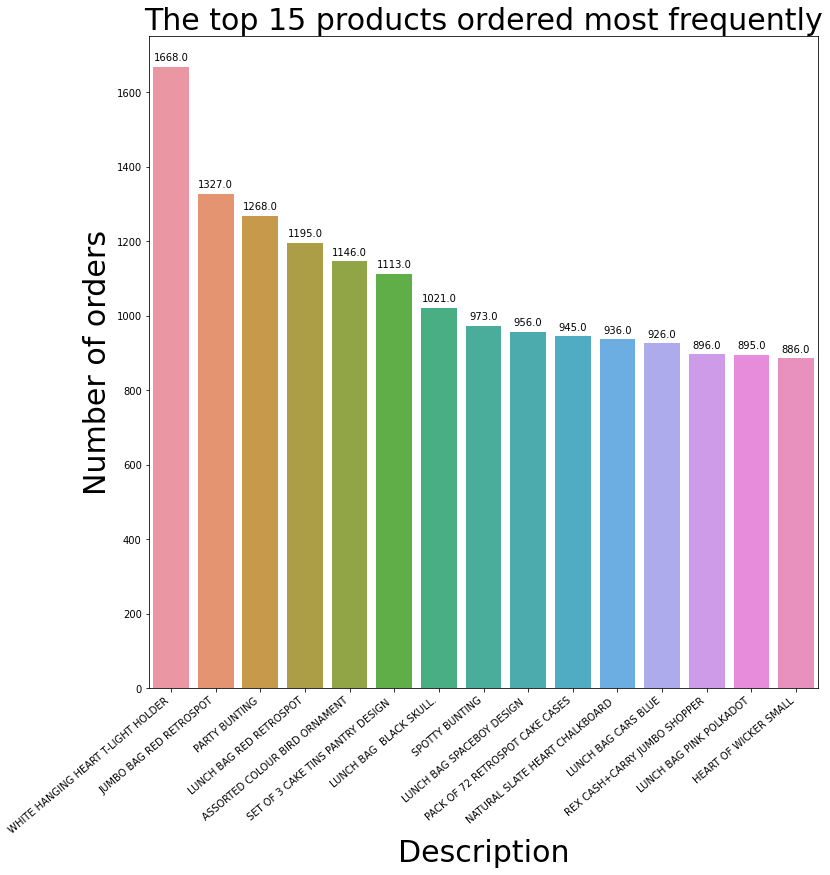

In [34]:
#Getting the top 15 most frequently ordered products
top_15_pro_freq = cs_df['Description'].value_counts().reset_index().rename(columns={'index':'Description','Description':'Count'})[0:15]

#Calling the visualisation function
create_visualisation(data=top_15_pro_freq,x='Description',y='Count',\
                     title='The top 15 products ordered most frequently',\
                     x_label='Description',y_label='Number of orders')

The product 'White hanging heart t-light holder' is the most frequently ordered product, around 1700 times. 'Jumbo bag red retrospot' is the second most ordered product, around 1300 times.

### <b>Products with the most quantity ordered:</b>

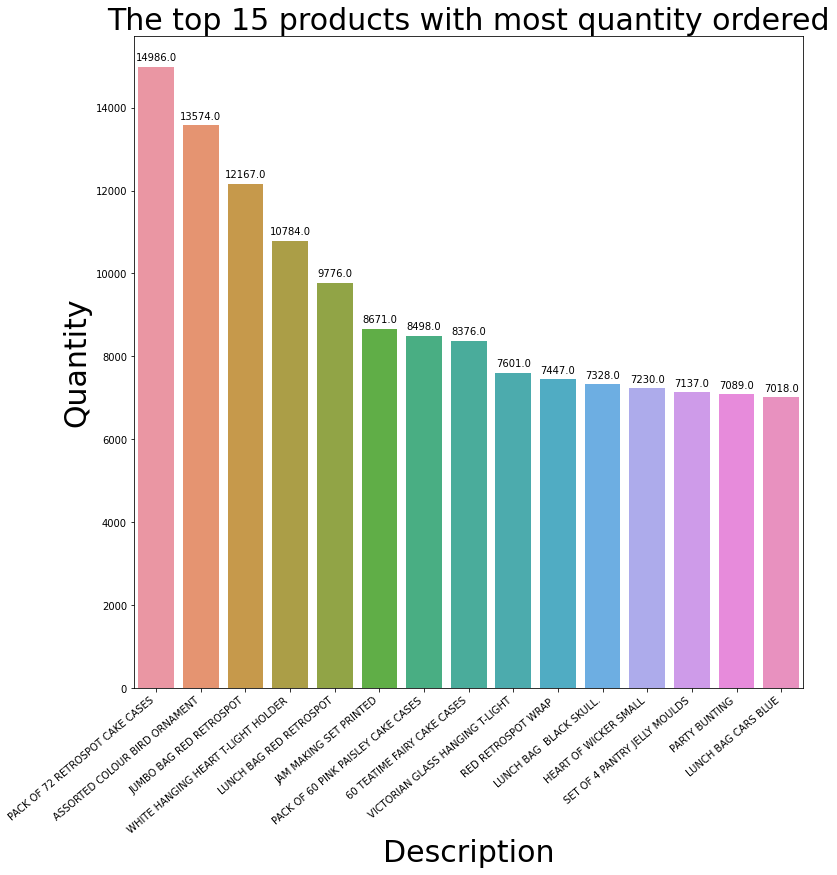

In [35]:
#Getting the top 15 products ordered with the most quantity
top_15_pro_quant = cs_df.groupby('Description')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)[0:15]

#Calling the visualisation function
create_visualisation(data=top_15_pro_quant,x='Description',y='Quantity',\
                     title='The top 15 products with most quantity ordered',\
                     x_label='Description',y_label='Quantity')

The product 'Pack of 72 retrospot cake cases' has the most quantity ordered, around 15,000 units. 'Assorted colour bird ornament' is second with around 13,000 units ordered.

### <b>Products that make the most money:</b>

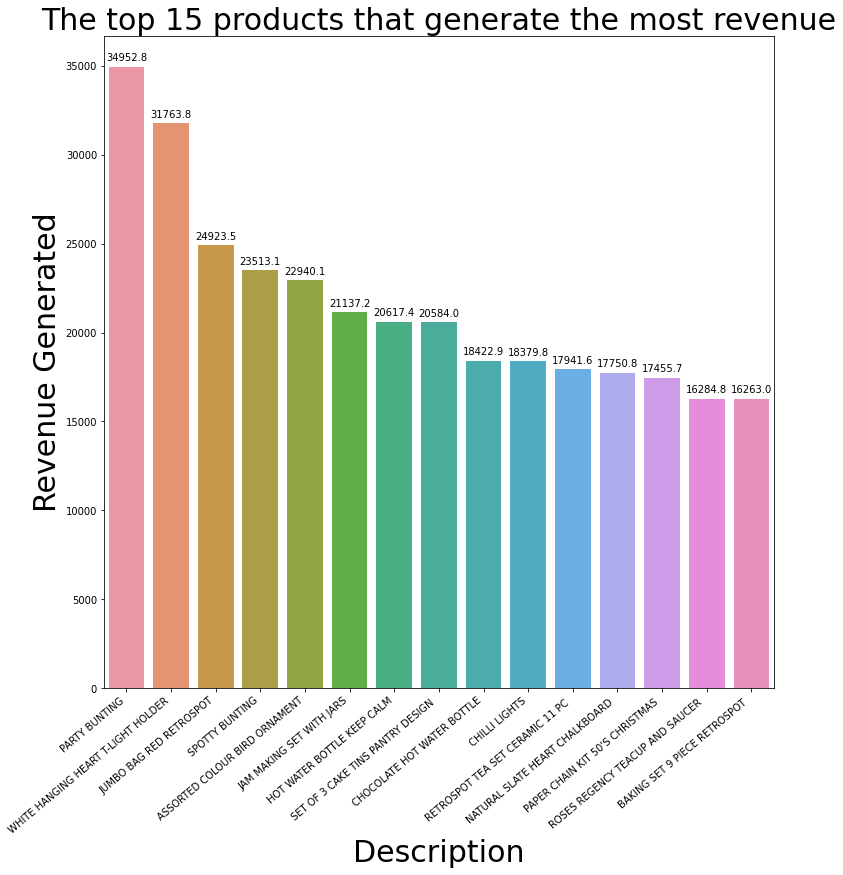

In [36]:
#Getting the top 15 products that generate the most amount of money
top_15_pro_money = cs_df.groupby('Description')['total_amount'].sum().reset_index().sort_values(by='total_amount',ascending=False)[0:15]

#Calling the visualisation function
create_visualisation(data=top_15_pro_money,x='Description',y='total_amount',\
                     title='The top 15 products that generate the most revenue',\
                     x_label='Description',y_label='Revenue Generated')

The product "Product Bunting" has made the most money, around 35,000 sterling. "White Hanging heart T-light holder" being the second, which has made around 32,000 sterling.

### <b>Customers who have placed the most orders:</b>

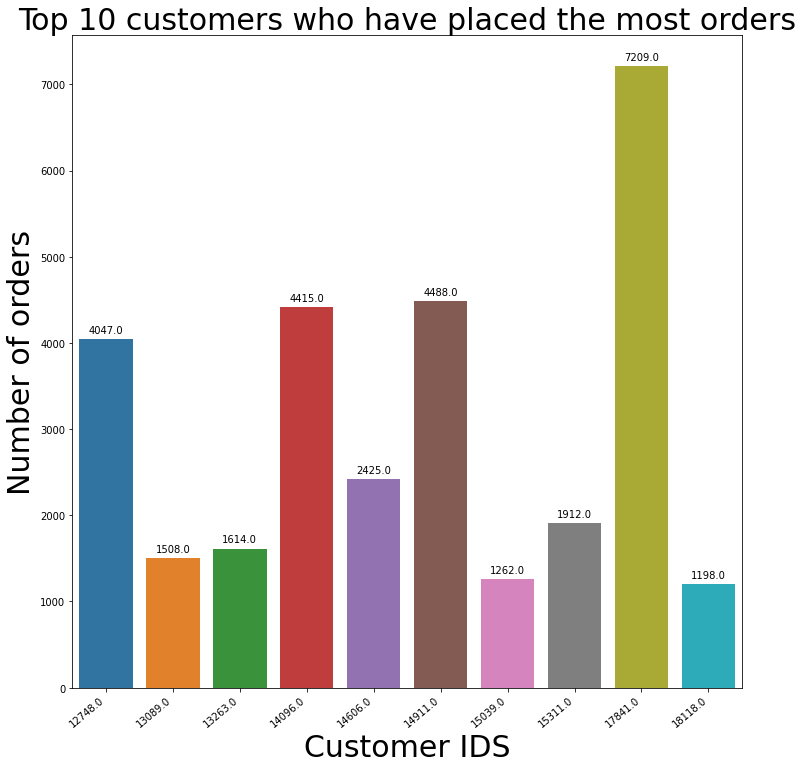

In [37]:
#Getting the top 15 products that generate the most amount of money
top_order_cust = cs_df['CustomerID'].value_counts().reset_index().sort_values(by='CustomerID',ascending=False)[0:10]

#Calling the visualisation function
create_visualisation(data=top_order_cust,x='index',y='CustomerID',\
                     title='Top 10 customers who have placed the most orders',\
                     x_label='Customer IDS',y_label='Number of orders')

The customer with the ID: 17841 has the highest number of orders and the customer with the ID: 18118 has the lowest number of orders.

### <b>Countries from which most orders have been made:</b>

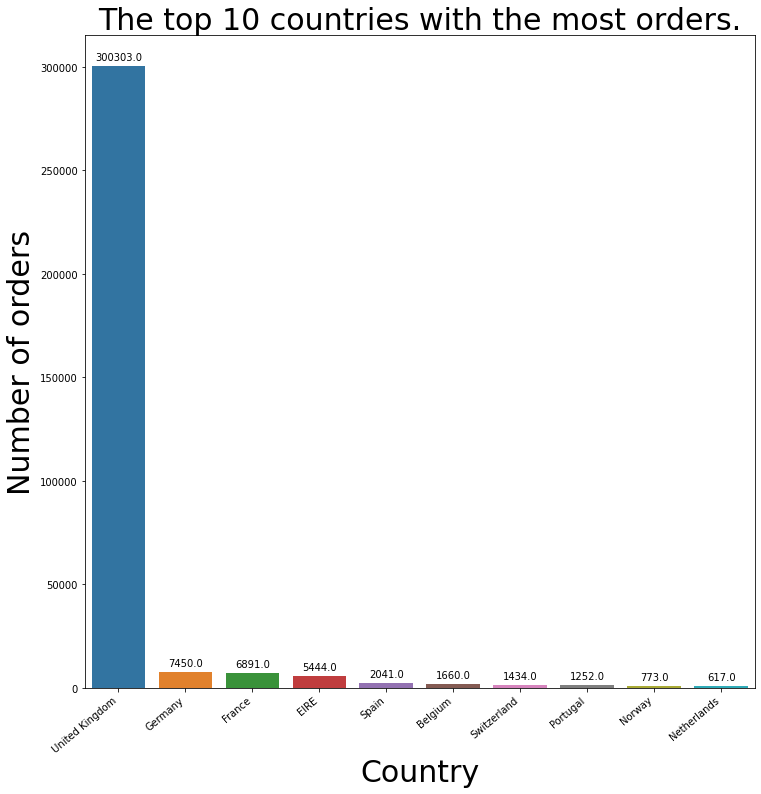

In [38]:
#Getting the countries with the most orders
top_countries_df = cs_df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Count'})[0:10]

#Calling the visualisation function
create_visualisation(data=top_countries_df,x='Country',y='Count',\
                     title='The top 10 countries with the most orders.',\
                     x_label='Country',y_label='Number of orders')

As we can see, United Kingdom has the most orders placed, with around 3 lakh orders. Germany being second, but way less than United Kingdom.

### <b>Hours for which most orders are made:</b>

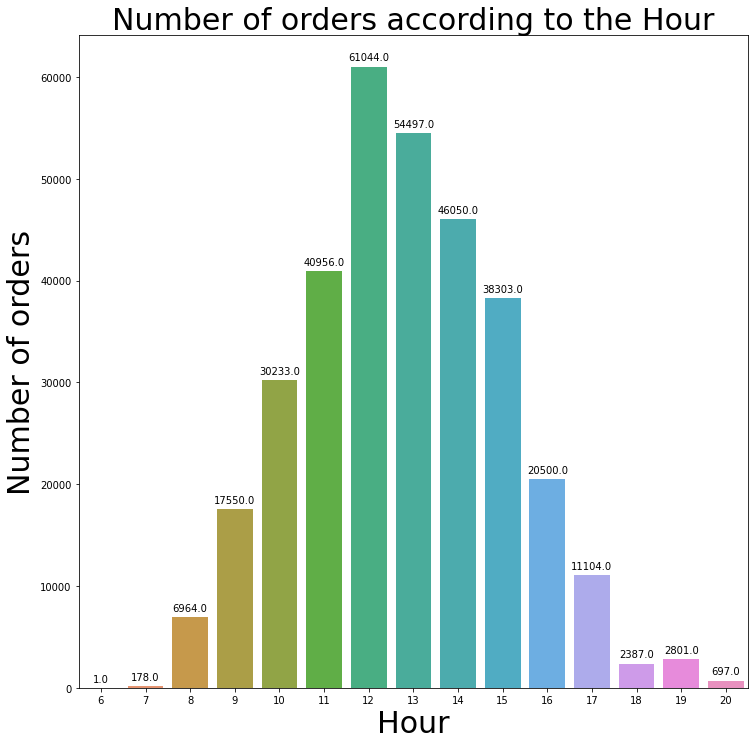

In [39]:
#Getting the number of orders for each hour
hour_df = cs_df['Hour'].value_counts().reset_index().sort_values(by='index')

#Calling the visualisation function
create_visualisation(data=hour_df,x='index',y='Hour',\
                     title='Number of orders according to the Hour',\
                     x_label='Hour',y_label='Number of orders',rotation=False)

Most orders are made in the 12th hour, i.e 12pm to 1pm, and the least orders are made in the 6th hour, i.e 6am to 7am. We can see that no orders are made between 8pm and 6am.

### <b>Day of the month on which most orders are made:</b>

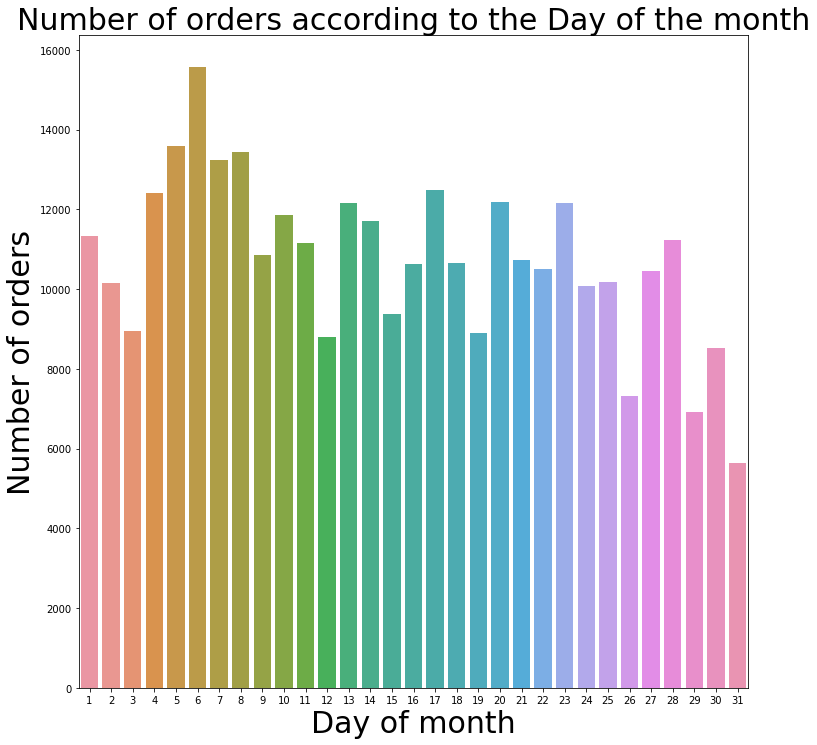

In [40]:
#Getting the number of orders as per the day of the month
day_of_month_df = cs_df['DayOfM'].value_counts().reset_index().sort_values(by='index')

#Calling the visualisation function
create_visualisation(data=day_of_month_df,x='index',y='DayOfM',\
                     title='Number of orders according to the Day of the month',\
                     x_label='Day of month',y_label='Number of orders',display_value=False,rotation=False)

The 6th day of the month has the highest number of orders and the 31st day has the lowest.

### <b>Day of the week on which most orders are made:</b>

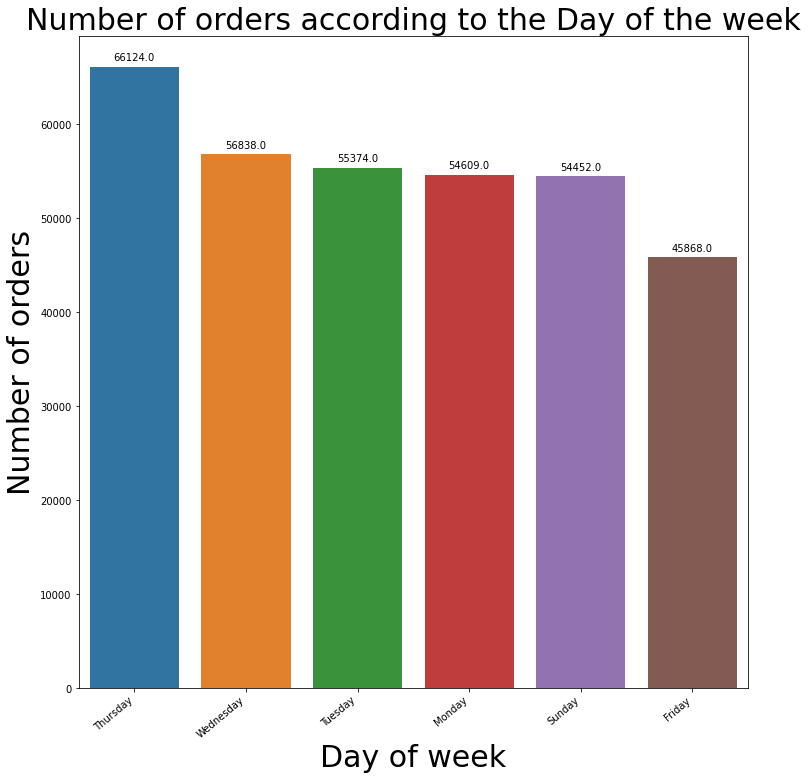

In [41]:
#Getting the number of orders as per the day of the week
day_of_week_df = cs_df['DayOfW'].value_counts().reset_index()

#Calling the visualisation function
create_visualisation(data=day_of_week_df,x='index',y='DayOfW',\
                     title='Number of orders according to the Day of the week',\
                     x_label='Day of week',y_label='Number of orders')

Most of the orders are made on Thurday,around 66 thousand, and the least number of orders are made on Friday, around 46 thousand.

### <b>Most orders made according to the month:</b>

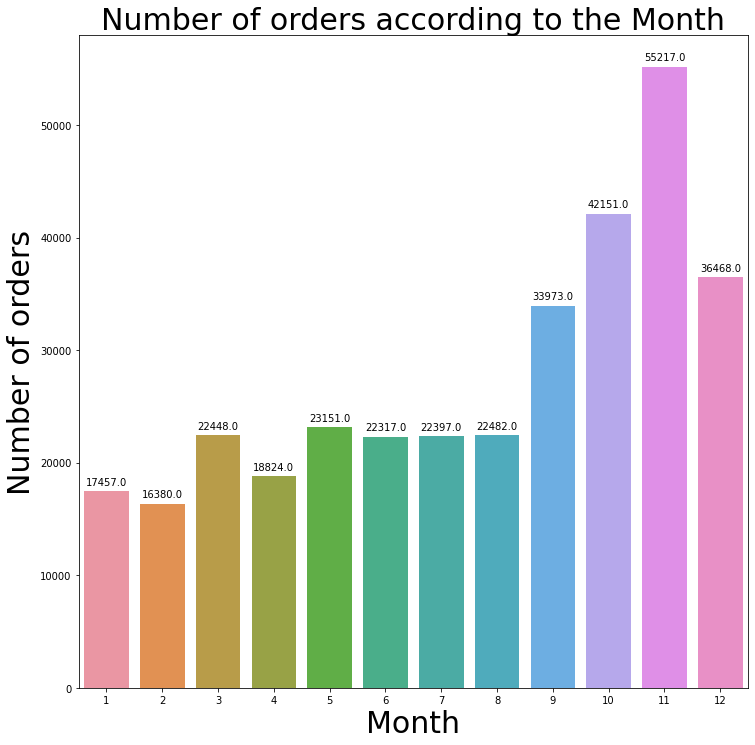

In [42]:
#Getting the number of orders as per the month
month_df = cs_df['Month'].value_counts().reset_index().sort_values(by='index')

#Calling the visualisation function
create_visualisation(data=month_df,x='index',y='Month',\
                     title='Number of orders according to the Month',\
                     x_label='Month',y_label='Number of orders',rotation=False)

The most number of orders are made in the 11th month, i.e December, and the least in the 2nd month, i.e February.

### <b>In this dataset we have only 1 month for the year 2010 and 12 months for 2011, therefore I think there is no need to perform any analysis on the year column.</b>

### <b>Distribution of the data:</b>

In [43]:
#Creating a list of all the numerical columns in the data
numerical_columns = list(cs_df.describe().columns)
numerical_columns

['Quantity',
 'UnitPrice',
 'CustomerID',
 'Hour',
 'DayOfM',
 'Month',
 'Year',
 'total_amount']

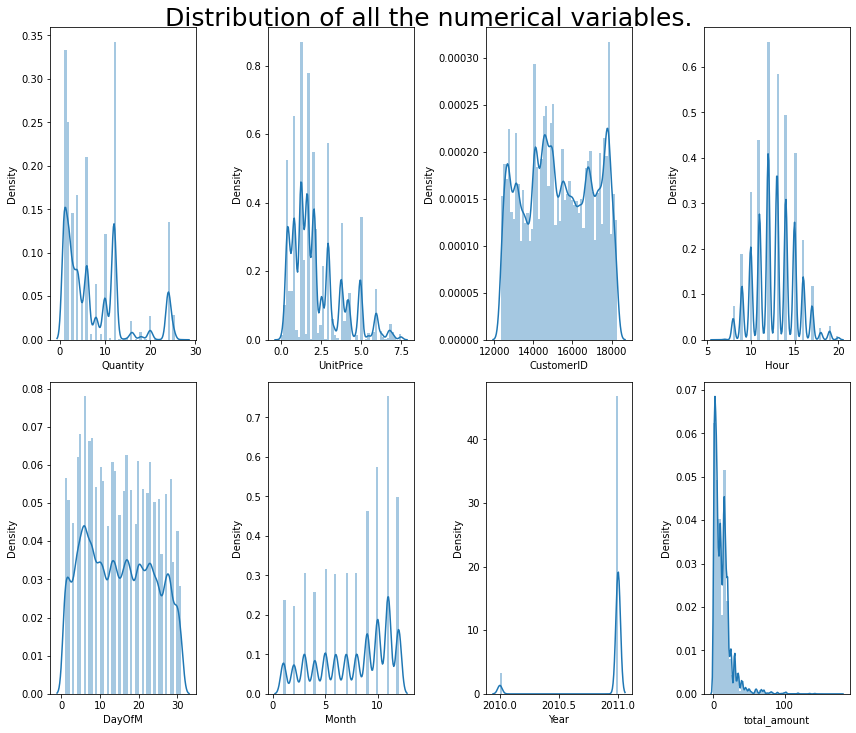

In [44]:
#Plotting the distribution of the data
plt.figure(figsize=(12,10))
plt.suptitle('Distribution of all the numerical variables.',va='bottom',size=25)
for index, item in enumerate(numerical_columns):
  plt.subplot(2,4,index+1)
  sns.distplot(cs_df[item])
plt.tight_layout()

### <b>Plotting the correlation matrix:</b>

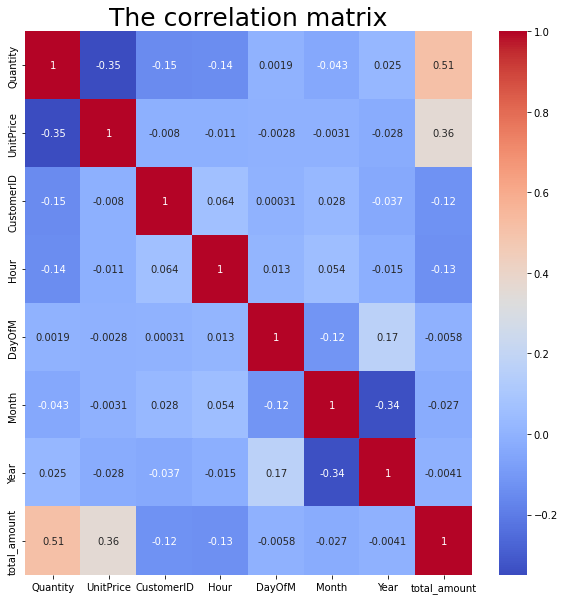

In [45]:
#Forming and plotting the correlation matrix
corr_matrix = cs_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('The correlation matrix',size=25)
plt.show()

As we can see, there is no distinct correlation between the variables except for the columns 'total_amount', 'Quantity' and 'UnitPrice', which is pretty understandable because of their relation with each other.

## <b>Forming the segmentation criteria:</b>

As stated earlier, I'll be performing Behavioral segmentation. To do this behavioral segmentation I'll be using the classical RFM (Recency, Frequency, Monetory) model. 

Refer to the picture below to know about RFM metrics.

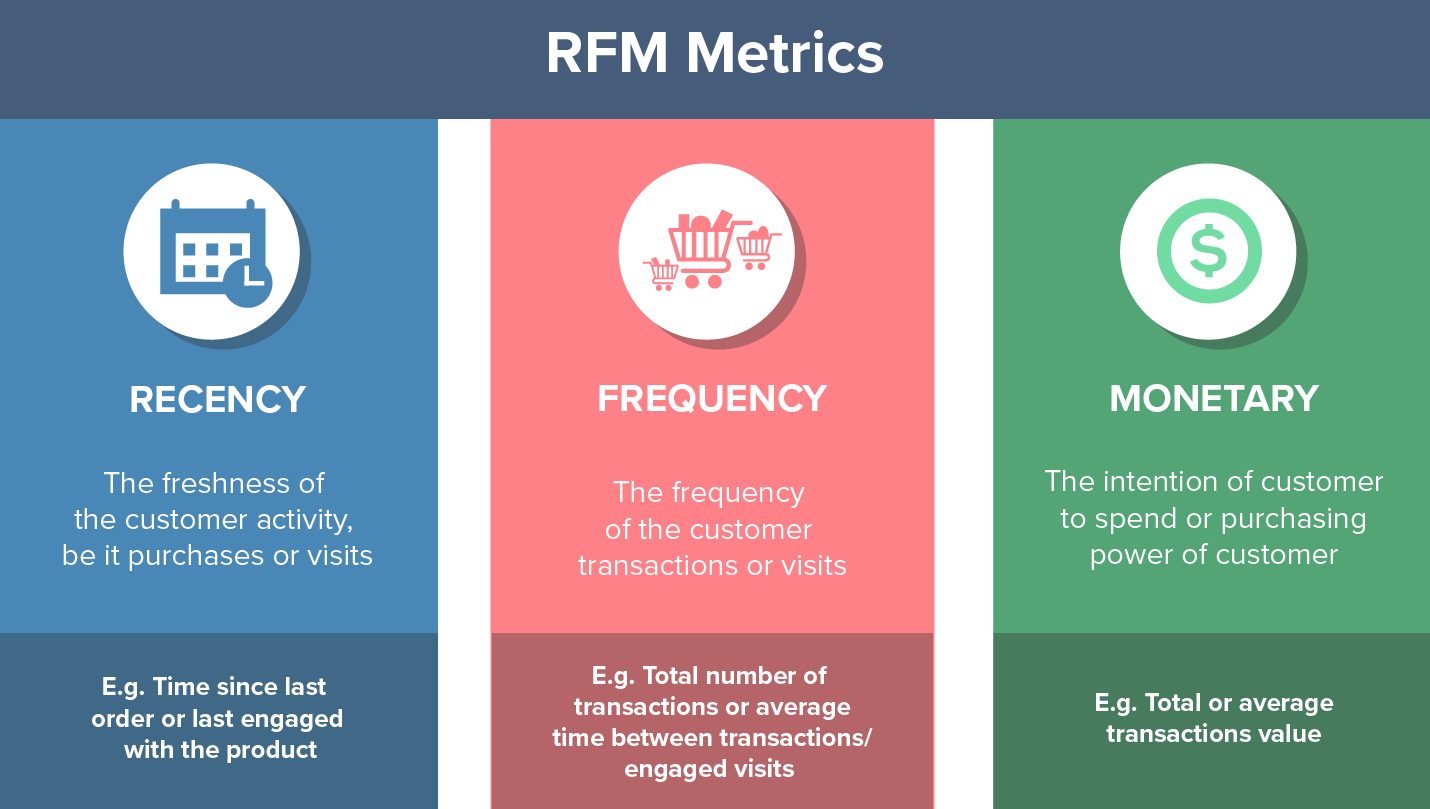

In [46]:
#Creating a variable to hold the latest date in the dataset
latest_date = cs_df['InvoiceDate'].max()

In [47]:
#Creating a dataframe to contain the most recent date of order for each customer
recency_df = cs_df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df.head()

,CustomerID,InvoiceDate
0,12347.0,2011-12-07
1,12348.0,2011-04-05
2,12349.0,2011-11-21
3,12350.0,2011-02-02
4,12352.0,2011-11-03


In [48]:
#creating a dataframe to contain the number of times a customer has ordered
frequency_df = cs_df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
frequency_df.head()

,CustomerID,InvoiceNo
0,12347.0,166
1,12348.0,6
2,12349.0,58
3,12350.0,16
4,12352.0,66


In [49]:
#creating a dataframe to contain the total spends of a customer
monetory_df = cs_df.groupby('CustomerID')['total_amount'].sum().reset_index()
monetory_df.head()

,CustomerID,total_amount
0,12347.0,3314.73
1,12348.0,90.20
2,12349.0,999.15
3,12350.0,294.40
4,12352.0,1130.94


In [50]:
#Creating a dataframe for the RFM model
rfm_df = pd.DataFrame()
rfm_df['CustomerID'] = recency_df['CustomerID']
rfm_df['Recency'] = recency_df['InvoiceDate'].apply(lambda x: (latest_date-x).days)
rfm_df['Frequency'] = frequency_df['InvoiceNo']
rfm_df['Monetary'] = monetory_df['total_amount']

In [51]:
#Setting the CustomerID as the index
rfm_df.set_index('CustomerID',inplace=True)

#First 10 observations of the RFM dataframe
rfm_df.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,166,3314.73
12348.0,248,6,90.20
12349.0,18,58,999.15
12350.0,310,16,294.40
12352.0,36,66,1130.94
12353.0,204,2,29.30
12354.0,232,40,682.69
12355.0,214,9,219.00
12356.0,245,33,1086.56


In [52]:
#Creating a list with the columns of the rfm dataframe
rfm_cols = ['Recency','Frequency','Monetary']

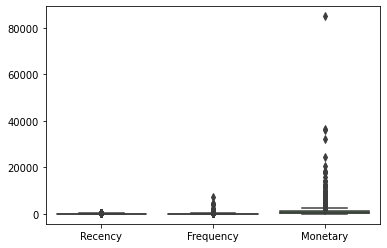

In [101]:
#Checking for outliers in the rfm dataframe
sns.boxplot(data=rfm_df[rfm_cols])
plt.title('Boxplot on RFM dataframe for outlier detection')
plt.show()

In [102]:
#shape of the dataframe before removing outliers
rfm_df.shape

(4192, 3)

In [103]:
#Removing the outliers
rfm_df = remove_outliers(data=rfm_df,col='Recency')
rfm_df = remove_outliers(data=rfm_df,col='Frequency')
rfm_df = remove_outliers(data=rfm_df,col='Monetary')

In [105]:
#Shape of the dataframe after deleting the outliers
rfm_df.shape

(3426, 3)

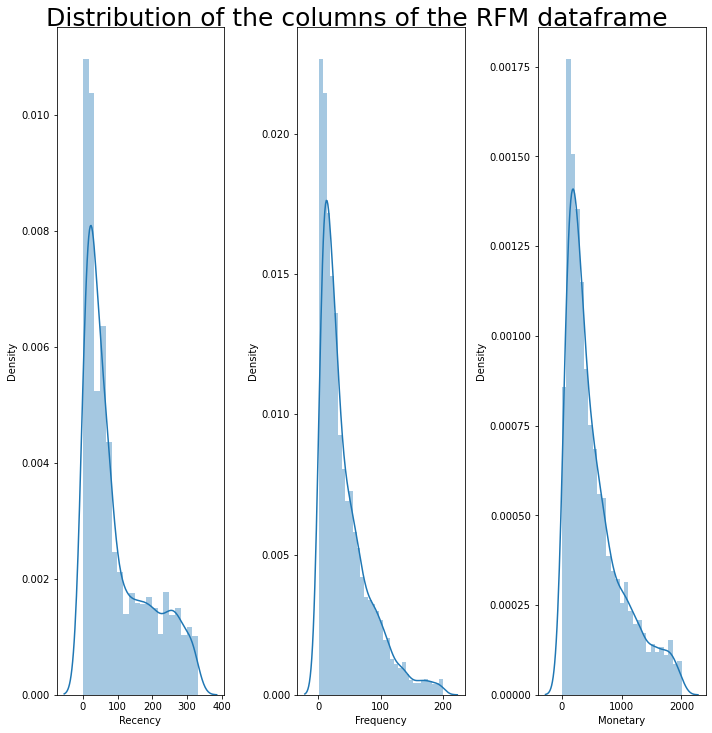

In [106]:
#Plotting the distribution of the columns of the RFM dataframe
plt.figure(figsize=(10,10))
plt.suptitle('Distribution of the columns of the RFM dataframe',va='bottom',size=25)
for index, item in enumerate(rfm_cols):
  plt.subplot(1,3,index+1)
  sns.distplot(rfm_df[item])
plt.tight_layout()

<b>Points to be noted from the distribution plots:</b>
1. Most of the customers have a Recency between 0-100 days.
2. Most of the customers have a frequency between 0-120 times.
3. Most of the customers have a Monetary between 0- 1000 sterlings.

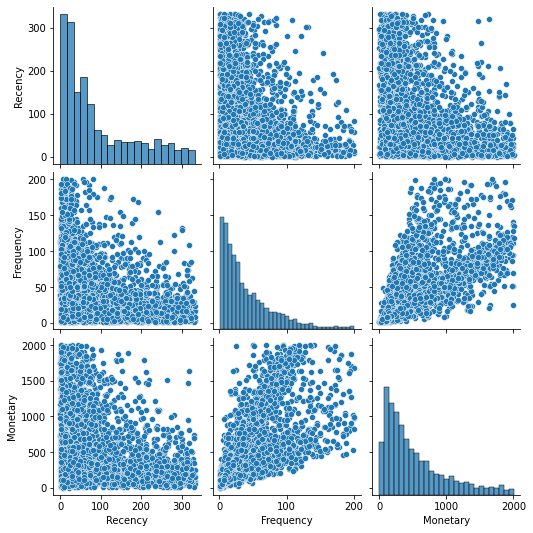

In [107]:
#plotting the pairplot to see the relation bewteen the columns of the RFM dataframe
sns.pairplot(rfm_df)
plt.show()

<b>Points to be noted from the pairplot:</b>

1. Most of the values are linked to lower recency values.
2. There are very few values linked to a large recency value and large monetary/frequency value.
3. The Frequency and Monetory column show a pretty linear relationship with each other.

## <b>Pre processing the data:</b>

In [173]:
#Scaling and normalising the data
scaler = StandardScaler()
normaliser = Normalizer()
rfm_scaled = scaler.fit_transform(rfm_df)
rfm_scaled = normaliser.fit_transform(rfm_scaled)

In [174]:
#A look of the scaled data
rfm_scaled

array([[ 0.78542253, -0.42650403, -0.44855965],
       [-0.61021127,  0.30869424,  0.72962324],
       [ 0.94244751, -0.26203598, -0.20767723],
       ...,
       [ 0.55325419, -0.55415866, -0.62194693],
       [-0.60638177, -0.54646777, -0.57764532],
       [-0.51977354,  0.19706303,  0.83126508]])

## <b>Model implementation: </b>

### <b>KMeans:</b>
k-means model is an unsupervised machine learning algorithm. k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

In [175]:
#Training the KMeans model on the dataset
kmeans_model_1 = KMeans(n_clusters=2,init='k-means++',max_iter=1000, random_state=0)
cluster_predict_1 = kmeans_model_1.fit_predict(rfm_scaled)
cluster_predict_1

array([0, 1, 0, ..., 0, 0, 1], dtype=int32)

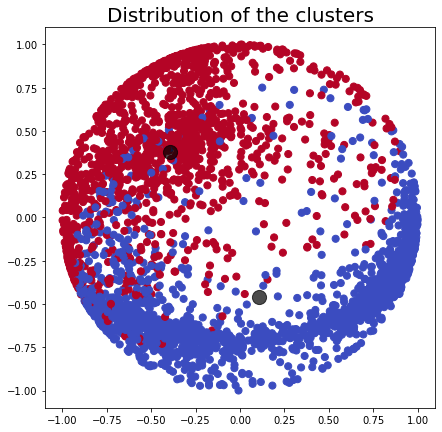

In [255]:
#Visualising the kmeans clustering
plt.figure(figsize=(7,7))
plt.scatter(x=rfm_scaled[:,0],y=rfm_scaled[:,1],c=cluster_predict_1,s=50,cmap='coolwarm')

#Plotting the cluster centres 
centers = kmeans_model_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7)

plt.title("Distribution of the clusters",size=20)
plt.show()

In [272]:
def eval_metrics(data:pd.DataFrame,labels: np.array):
  """A function that calculates the evaluation metrics 
     for the unsupervised machine learning algorithm."""
  #A higher silhouette score is better  
  sh_score = silhouette_score(data,labels)

  #A higher calinski harabasz score is better
  ch_index = calinski_harabasz_score(data,labels)

  #A lower Davies Bouldin score is better
  db_score = davies_bouldin_score(data,labels)
  print('The evaluation metrics are:\n')
  print('1. The silhouette score is:',sh_score)
  print('\n2. The Calinski harabasz index is:',ch_index)
  print('\n3. The Davies Bouldin score is:',db_score)

In [269]:
#Calculating the evaluation metrics for the K-means model
eval_metrics(rfm_scaled,cluster_predict_1)

The evaluation metrics are:

1. The silhouette score is: 0.43614997462456956

2. The Calinski harabasz index is: 2738.106992285435

3. The Davies Bouldin score is: 1.0318044978553205


### <b>K-Means with elbow method:</b>

<b>Elbow method:</b> In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

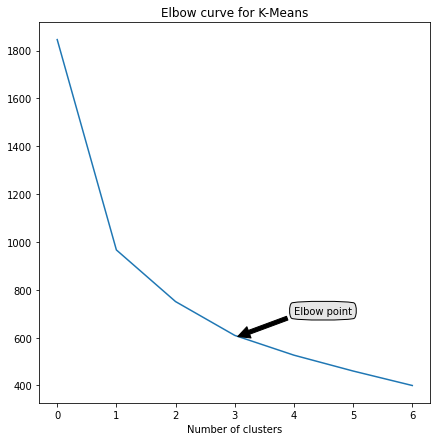

In [193]:
#Getting the elbow curve for different number of clusters
wcss = []

#Creating a list of number of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

#Implementing the model for different number of clusters
for num_clusters in range_n_clusters:
    kmeans_model = KMeans(n_clusters=num_clusters,max_iter=1000,random_state=0)
    kmeans_model.fit_predict(rfm_scaled)
    
    wcss.append(kmeans_model.inertia_)
    
# plot the elbow curve 
plt.figure(figsize=(7,7))
plt.plot(wcss)
plt.title('Elbow curve for K-Means')
plt.xlabel('Number of clusters')
plt.annotate('Elbow point', xy=(3, 600), xytext=(4,700),\
             bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),\
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

As we can see, the Elbow point is 3 and therefore we will apply a KMeans model with 3 clusters on our data.

In [194]:
#Implementing KMeans with 3 clusters
kmeans_model_2 = KMeans(n_clusters=3,max_iter=1000,random_state=0)
cluster_predict_2 = kmeans_model_2.fit_predict(rfm_scaled)
cluster_predict_2

array([1, 2, 1, ..., 1, 0, 2], dtype=int32)

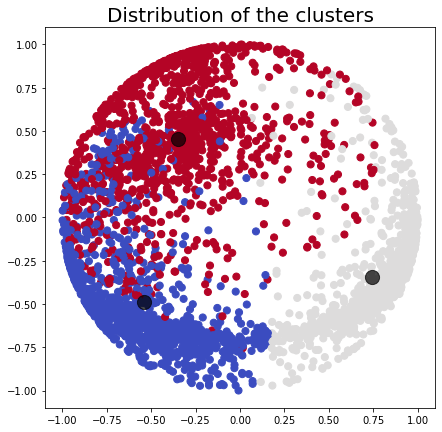

In [256]:
#Visualising the kmeans clustering
plt.figure(figsize=(7,7))
plt.scatter(x=rfm_scaled[:,0],y=rfm_scaled[:,1],c=cluster_predict_2,s=50,cmap='coolwarm')

#Plotting the cluster centres 
centers = kmeans_model_2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7)

plt.title("Distribution of the clusters",size=20)
plt.show()

In [270]:
#Calculating the evaluation metrics for the K-means model with 3 clusters
eval_metrics(rfm_scaled,cluster_predict_2)

The evaluation metrics are:

1. The silhouette score is: 0.5233813538947185

2. The Calinski harabasz index is: 4171.061280039037

3. The Davies Bouldin score is: 0.6889724769260258


#### <b>Cluster profiling for KMeans with 3 clusters.</b>

In [204]:
#Creating a copy of the original dataframe
rfm_kmeans = rfm_df.copy()

In [207]:
#Assigning the labels to the dataframe
rfm_kmeans['Labels'] = cluster_predict_2

#Checking the value counts for different lables
rfm_kmeans['Labels'].value_counts()

0    1233
2    1185
1    1008
Name: Labels, dtype: int64

In [218]:
#Getting the mean values for each label
rfm_kmeans.groupby('Labels').mean()

,Recency,Frequency,Monetary
Labels,,,
0,42.494728,20.560422,283.006441
1,216.213294,20.368056,267.428175
2,44.688608,81.384810,1026.600440


In [238]:
def visualise_dist(data:pd.DataFrame,y:str,x:str='Labels'):
  """A function that produces a boxplot visualisation
     which shows the distribution of the data over
     different clusters in the data"""
  sns.boxplot(data=data,x=x,y=y)
  plt.title(f'{y} value distribution among different labels')
  plt.show()

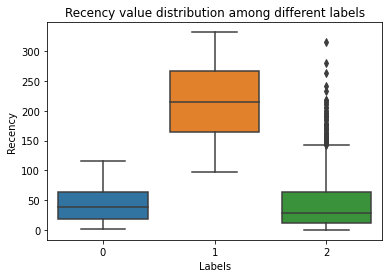

In [240]:
#Visualising the values of recency for different Labels
visualise_dist(rfm_kmeans,y='Recency')

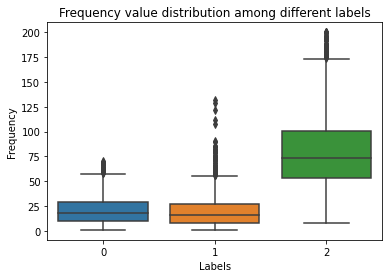

In [241]:
#Visualising the values of frequency for different Labels
visualise_dist(rfm_kmeans,y='Frequency')

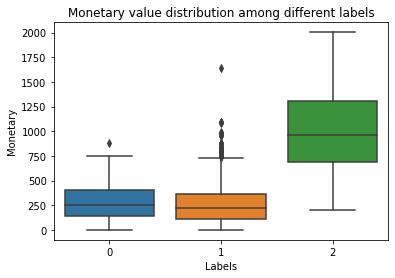

In [242]:
#Visualising the values of Monetary for different Labels
visualise_dist(rfm_kmeans,y='Monetary')

<b>Profiling:</b>
1. Cluster 0 - These are the customers who have low monetary contribution, low frequency and low recency value. (Medium-importance cluster)
2. Cluster 1 - These are the customers who have low monetary contribution, low frequency and high recency value. (Low-importance cluster) (Worst cluster)
3. Cluster 2 - These are the customers who have high monetary contribution, high frequency value and low recency value. (High-importance cluster) (Best Cluster)

Actions to take for each cluster:
1. Perform targeted analysis and targeted advertisement for each cluster.
2. Advertise products that can be presented with a discount to the customers in the lesser important clusters, which could convert the customers in these less important groups to customers of more important clusters.

### <b>Hierarchical clustering:</b>

Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.

In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.

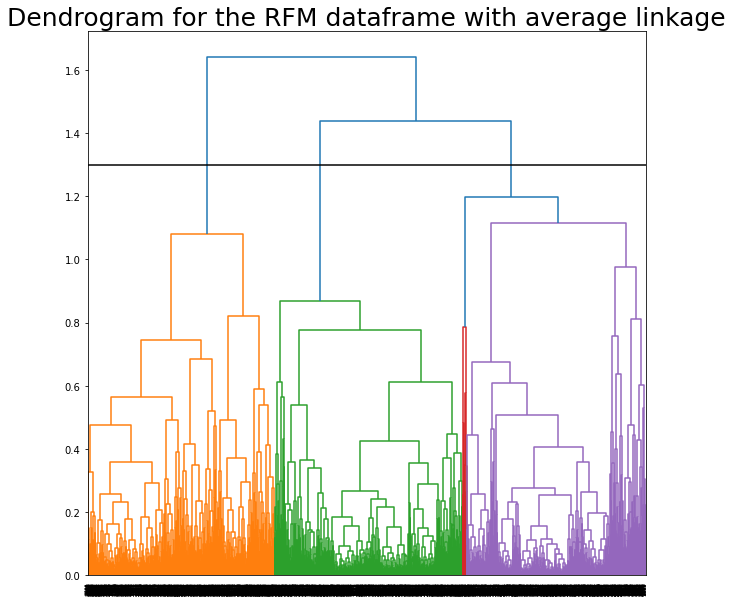

In [227]:
#Getting the number of clusters using dendogram
plt.figure(figsize=(10,10))
merging = linkage(rfm_scaled,method='average',metric='euclidean')
dendrogram(merging)
plt.title('Dendrogram for the RFM dataframe with average linkage',size=25)

#Cutting the dendrogram at the longest vertical line without being cut by a horizontal line 
plt.axhline(y=1.3,c='k')
plt.show()

<b>We get the optimum number of clusters as 3 from the dendrogram.</b>

Hierarchical clustering has 2 types:
1. Agglomerative clustering.
2. Divisive Clustering.

In this project I'll be applying the Agglomerative approach.

In [229]:
#Applying the Agglomerative clustering model on the RFM dataset
agglo_model = AgglomerativeClustering(n_clusters=3,linkage='average',affinity='euclidean')
cluster_predict_3 = agglo_model.fit_predict(rfm_scaled)

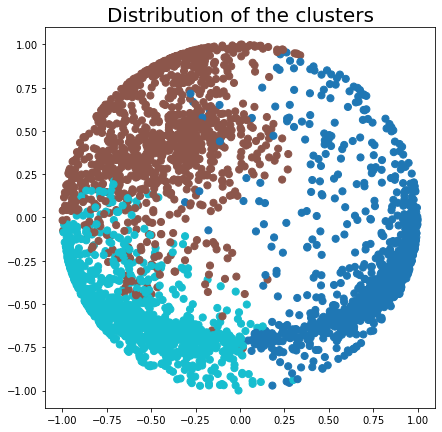

In [236]:
#Visualising the agglomerative clustering
plt.figure(figsize=(7,7))
plt.scatter(x=rfm_scaled[:,0],y=rfm_scaled[:,1],c=cluster_predict_3,s=50,cmap='tab10')

plt.title("Distribution of the clusters",size=20)
plt.show()

In [271]:
#Calculating the evaluation metrics for the Agglomerative model
eval_metrics(rfm_scaled,cluster_predict_3)

The evaluation metrics are:

1. The silhouette score is: 0.49581156711609203

2. The Calinski harabasz index is: 3616.1645379260995

3. The Davies Bouldin score is: 0.7118183809778085


#### <b>Cluster profiling for agglomerative approach with 3 clusters:</b>

In [248]:
#Creating a copy of the original RFM dataframe
rfm_agglo = rfm_df.copy()

In [249]:
#Assigning the labels to all the cusotmers
rfm_agglo['Labels'] = cluster_predict_3
rfm_agglo.head()

,Recency,Frequency,Monetary,Labels
CustomerID,,,,
12348.0,248,6,90.20,0
12349.0,18,58,999.15,1
12350.0,310,16,294.40,0
12352.0,36,66,1130.94,1
12353.0,204,2,29.30,0


In [251]:
#Checking the value counts for different lables
rfm_agglo['Labels'].value_counts()

2    1152
1    1150
0    1124
Name: Labels, dtype: int64

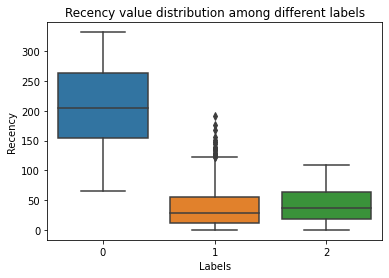

In [252]:
#Visualising the values of recency for different Labels
visualise_dist(rfm_agglo,y='Recency')

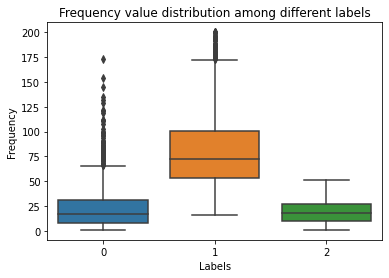

In [253]:
#Visualising the values of Frequency for different Labels
visualise_dist(rfm_agglo,y='Frequency')

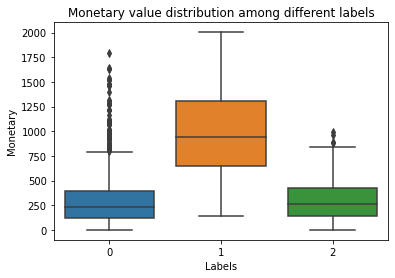

In [254]:
#Visualising the values of Monetary for different Labels
visualise_dist(rfm_agglo,y='Monetary')

<b>Profiling:</b>
1. Cluster 0 - This is the cluster with high recency value, low frequency value and a low monetary contribution. (Low-importance cluster) (Worst cluster)
2. Cluster 1 - This is the cluster with low recency value, high frequency and a high monetary contribution. (High importance cluster) (Best Cluster)
3. Cluster 2 - This is the cluster with low recency value, low frequency and a low monetary contribution. (Medium-importance cluster)

## <b>Conclusion:</b>


### <b>EDA insights:</b>

### <b>Model implementation conclusion:</b>

In [275]:
#Using pretty table to give model conclusions
from prettytable import PrettyTable

#Creating the Table
my_table = PrettyTable(['Model name','Tuning Method','Number of Clusters','Silhouette score','Calinski harabasz index','Davies Bouldin score'])

#Adding rows that contain info about the models implemented.
my_table.add_row(['K Means','None','2','0.4361499','2738.10','1.03180'])
my_table.add_row(['K means with elbow method','elbow method','3','0.5233813','4171.061','0.688972'])
my_table.add_row(['Hierarchical clustering','Dendrogram','3','0.4958115','3616.164','.711818'])

print('Conclusion from model implementation:\n')
print(my_table)
print('\n K means with elbow method is the best model and simple K means is the worst performing model')

Conclusion from model implementation:

+---------------------------+---------------+--------------------+------------------+-------------------------+----------------------+
|         Model name        | Tuning Method | Number of Clusters | Silhouette score | Calinski harabasz index | Davies Bouldin score |
+---------------------------+---------------+--------------------+------------------+-------------------------+----------------------+
|          K Means          |      None     |         2          |    0.4361499     |         2738.10         |       1.03180        |
| K means with elbow method |  elbow method |         3          |    0.5233813     |         4171.061        |       0.688972       |
|  Hierarchical clustering  |   Dendrogram  |         3          |    0.4958115     |         3616.164        |       .711818        |
+---------------------------+---------------+--------------------+------------------+-------------------------+----------------------+

 K means with e

### <b>Challenges faced:</b>